# Image Segmentation with CellPose
CellPose is a deep-learning based segmentation algorithm for cells and nuclei in microscopy images.

* [Cellpose in Nature Methods](https://www.nature.com/articles/s41592-020-01018-x)
* [Cellpose on github](https://github.com/MouseLand/cellpose)
* [Cellpose example notebook](https://github.com/MouseLand/cellpose/blob/master/notebooks/run_cellpose.ipynb)

As usual, we start with loading an example image.

In [1]:
from skimage.io import imread, imshow
image = imread('https://samples.fiji.sc/blobs.png')

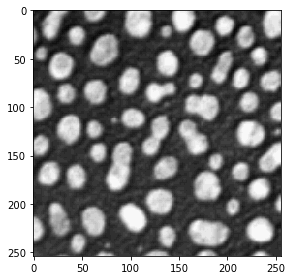

In [2]:
imshow(image)

## Loading a pretrained model
CellPose comes with a number of pretrained models, e.g. for segmenting images showing cells or nuclei. We will just load a model for segmenting nuclei.

In [3]:
from cellpose import models, io

model = models.Cellpose(gpu=False, model_type='nuclei')

>>>> using CPU
Running test snippet to check if MKL-DNN working
see https://pytorch.org/docs/stable/backends.html?highlight=mkl
** MKL version working - CPU version is sped up. **


We let the model "evaluate" the image to produce masks of segmented nuclei.

processing 1 image(s)
computing styles from images
time spent: running network 1.50s; flow+mask computation 0.21
estimated cell diameters for 1 image(s) in 3.65 sec
>>> diameter(s) =  [19.24870665]
time spent: running network 6.62s; flow+mask computation 0.30
estimated masks for 1 image(s) in 6.92 sec
>>>> TOTAL TIME 10.57 sec


C:\Programs\miniconda3\envs\beetlesafari\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


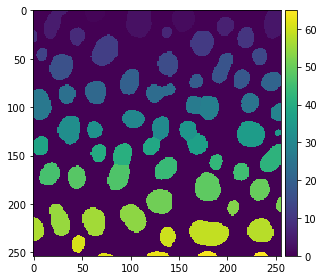

In [4]:
channels = [0,0] # This means we are processing single-channel greyscale images.

masks, flows, styles, diams = model.eval(image, diameter=None, channels=channels)

imshow(masks)

## Result visualization
Cell / nuclei segmentation results can be checked best if the resulting label image is overlaid to the original image or by drawing outlines around segmented regions.

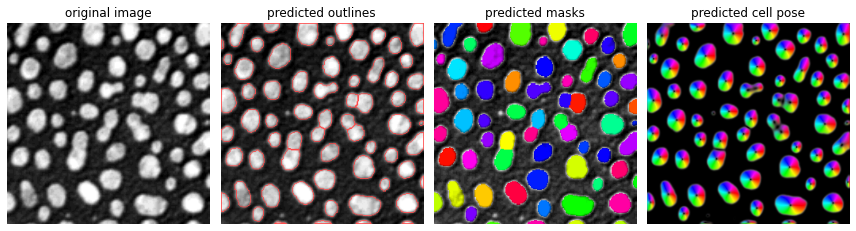

In [5]:
from cellpose import plot
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, image, masks, flows[0], channels=channels)
plt.tight_layout()
plt.show()

## More available pretrained models
CellPose offers a couple of pretrained models. You can print their names our like this:

In [6]:
import cellpose
cellpose.models.urls

['https://www.cellpose.org/models/cyto_0',
 'https://www.cellpose.org/models/cyto_1',
 'https://www.cellpose.org/models/cyto_2',
 'https://www.cellpose.org/models/cyto_3',
 'https://www.cellpose.org/models/size_cyto_0.npy',
 'https://www.cellpose.org/models/cytotorch_0',
 'https://www.cellpose.org/models/cytotorch_1',
 'https://www.cellpose.org/models/cytotorch_2',
 'https://www.cellpose.org/models/cytotorch_3',
 'https://www.cellpose.org/models/size_cytotorch_0.npy',
 'https://www.cellpose.org/models/nuclei_0',
 'https://www.cellpose.org/models/nuclei_1',
 'https://www.cellpose.org/models/nuclei_2',
 'https://www.cellpose.org/models/nuclei_3',
 'https://www.cellpose.org/models/size_nuclei_0.npy',
 'https://www.cellpose.org/models/nucleitorch_0',
 'https://www.cellpose.org/models/nucleitorch_1',
 'https://www.cellpose.org/models/nucleitorch_2',
 'https://www.cellpose.org/models/nucleitorch_3',
 'https://www.cellpose.org/models/size_nucleitorch_0.npy']